# Artificial Neural Networks and Deep Learning---## Homework 1: Minimal Working ExampleTo make your first submission, follow these steps:1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.2. Upload the `training_set.npz` file to this folder.3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.4. Load and process the data.5. Implement and train your model.6. Submit the generated `.zip` file to Codabench.

## 🌐 Connect Colab to Google Drive

In [1]:
!pip install tensorflow==2.17.0 keras==3.4.1 tensorflow-decision-forests==1.10.0 tensorflow-text==2.17.0 tf-keras==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.9 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 82.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 99.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.2 MB/s eta 0:00:0000:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1

## ⚙️ Import Libraries

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import keras_cv

np.random.seed(42)
tf.random.set_seed(42);


## ⏳ Load the Data

In [118]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Carica il dataset
data = np.load('/kaggle/input/blood-cells/training_set.npz')
X_train = data['images']
y_train = data['labels']


# Carica il dataset
data2 = np.load('/kaggle/input/blood-cells/test_set.npz')
X_test2 = data['images']
y_test2 = data['labels']


# Converti y in one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test2 = tf.keras.utils.to_categorical(y_test2, num_classes=8)


In [119]:
import hashlib

def image_hash(image):
    image_bytes = image.tobytes()
    return hashlib.sha256(image_bytes).hexdigest()

unique_images = []
unique_labels = []
duplicate_positions = set()

seen_hashes = {}

for i in range(len(X_train)):
    img_hash = image_hash(X_train[i])
    if img_hash not in seen_hashes:
        if i not in duplicate_positions:
            unique_images.append(X_train[i])
            unique_labels.append(y_train[i])
        seen_hashes[img_hash] = i
    else:
        duplicate_positions.add(seen_hashes[img_hash])
        duplicate_positions.add(i)

X_train = [X_train[i] for i in range(len(X_train)) if i not in duplicate_positions]
y_train = [y_train[i] for i in range(len(y_train)) if i not in duplicate_positions]

X_train = np.array(X_train)
y_train = np.array(y_train)


In [120]:
# split train in training and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Preprocessing

In [121]:
def augment(images, labels):
    
    augmenter = keras_cv.layers.Augmenter(
    layers = [
            keras_cv.layers.RandomFlip(
                mode="horizontal_and_vertical"
            ),
            keras_cv.layers.RandomRotation(
                factor=0.2,
                fill_mode='nearest'
            ),
            keras_cv.layers.MixUp(
                alpha=0.5,
            ),
            keras_cv.layers.CutMix(
                alpha=0.5
            )
        ]
    )
        
    inputs = {"images": images, "labels": labels}
    output = augmenter(inputs)
    return output["images"], output["labels"]

In [122]:

# Funzione per prendere immagini ed etichette casuali
def sample_random_images(dataset, sample_size=5):
    random_samples = dataset.shuffle(buffer_size=1000).take(sample_size)
    images = []
    labels = []
    for image, label in random_samples:
        images.append(image.numpy())
        labels.append(label.numpy())
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

# Converte i dati di addestramento in tf.data.Dataset
X_train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))


In [123]:
sample_size = 1000
random_X, random_y = sample_random_images(X_train_dataset, sample_size)
aug_images, aug_labels = augment(random_X, random_y)

In [125]:
X_train = tf.concat([X_train, aug_images], axis=0)
y_train = tf.concat([y_train, aug_labels], axis=0)

In [126]:
print(X_train.shape)
print(y_train.shape)

(11748, 96, 96, 3)
(11748, 8)


In [127]:
sample_size = 1000

augmenter = tf.keras.Sequential([
            keras_cv.layers.RandAugment([0,255],3,0.2)
    ]
)
    
random_X, random_y = sample_random_images(X_train_dataset, sample_size)
random_y = tf.cast(random_y, dtype=tf.float32)

aug_images = augmenter(random_X)


In [128]:
print(aug_images.shape)
print(aug_labels.shape)

(1000, 96, 96, 3)
(1000, 8)


In [129]:
X_train = tf.concat([X_train, aug_images], axis=0)
y_train = tf.concat([y_train, random_y], axis=0)

In [134]:
X_train = X_train.numpy()
y_train = y_train.numpy()

In [136]:
print(X_train.shape)
print(y_train.shape)

(12748, 96, 96, 3)
(12748, 8)


Class tf.Tensor(
[0.         0.4119306  0.         0.01720997 0.57085943 0.
 0.         0.        ], shape=(8,), dtype=float32)


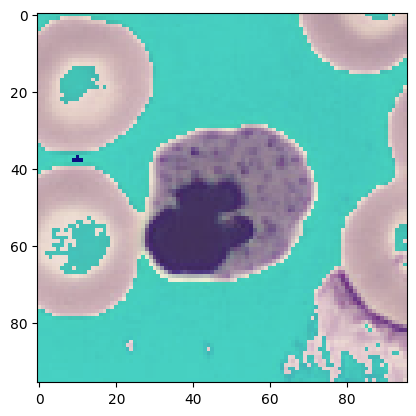

In [110]:
import matplotlib.pyplot as plt

plt.imshow(X_train[-2] / 255.0)
print('Class', aug_labels[1])

## 🛠️ Train and Save the Model

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0.], shape=(8,), dtype=float64)


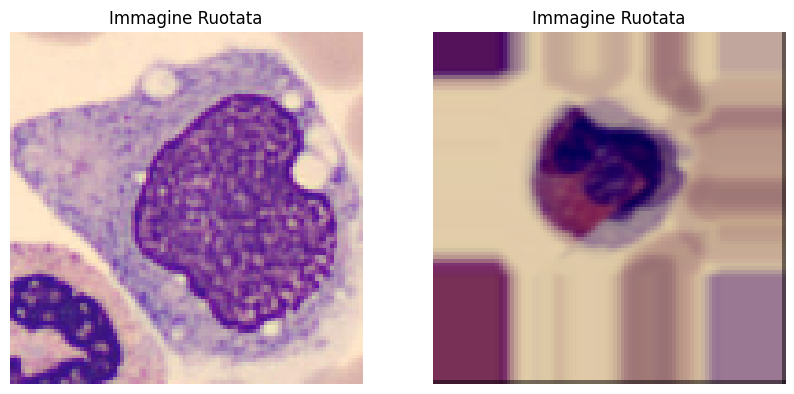

In [89]:
import matplotlib.pyplot as plt
import keras_cv

data_augmentation = model.get_augmentation_layer()

# Applica la rotazione casuale
rotated_image = data_augmentation(aug_images[8])
print(y_train[6001])

# Visualizza l'immagine originale e quella ruotata
plt.figure(figsize=(10, 5))

# Mostra l'immagine ruotata
plt.subplot(1, 2, 1)
plt.imshow(X_train[6001])
plt.title("Immagine Ruotata")
plt.axis('off')


# Mostra l'immagine ruotata
plt.subplot(1, 2, 2)
plt.imshow(rotated_image / 255.0)
plt.title("Immagine Ruotata")
plt.axis('off')

plt.show()

In [161]:
import numpy as np
import tensorflow as tf
import keras_cv
from tensorflow import keras as tfk
from tensorflow.keras import layers, models, applications
from tensorflow.keras.callbacks import LambdaCallback
import random
import keras
from keras.saving import register_keras_serializable
from sklearn.utils.class_weight import compute_class_weight


class MyModel:
    def __init__(self):
        """
        Inizializza lo stato interno del modello MobileNetV3Small pre-addestrato.
        """
        self.strategy = tf.distribute.MirroredStrategy()
        self.neural_network = self.create_model()

    def get_augmentation_layer(self):

        return tf.keras.Sequential([
            # Rotazione casuale
            keras.layers.RandomRotation(0.5, fill_mode='reflect'),

            # Zoom casuale in altezza
            keras.layers.RandomZoom(height_factor=(-0.2, 0.7), fill_mode='nearest'),

            # Altri tipi di augmentazioni
            keras.layers.RandomZoom(height_factor=(0.0, 0.0), width_factor=(-0.2, 0.2), fill_mode='nearest'),
            keras.layers.RandomFlip(mode="horizontal"),
            keras.layers.RandomFlip(mode="vertical"),
            keras.layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
            
            keras.layers.RandomBrightness(0.3),
            #keras_cv.layers.RandomHue(0.3, [0,255]),
            keras_cv.layers.RandomContrast([0, 255], 0.3),
            keras_cv.layers.RandomGaussianBlur(2, 3),
            #keras_cv.layers.RandomCutout(0.3, 0.3,"gaussian_noise"),

            # Aggiunta di rumore gaussiano
            keras.layers.GaussianNoise(0.05)
        ])


    def create_model(self):
        """
        Crea e restituisce un modello con MobileNetV3Small.
        """
        # Definisci i layer di data augmentation
        data_augmentation = self.get_augmentation_layer()
        
        with self.strategy.scope():

            # Utilizza una rete pre-addestrata
            model_pretrained = tfk.applications.ConvNeXtLarge(
                input_shape=(96, 96, 3),
                include_top=False,
                weights='imagenet',
                pooling='avg'  # Pooling globale per ridurre la dimensionalità
            )
            self.model_name_pretrained = 'convnext_large'

            print("number of layers:")
            print(len(model_pretrained.layers))

            # Costruisci il modello
            inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')    
            x = data_augmentation(inputs)
            x = model_pretrained(x)

            x = tfk.layers.Dense(512, activation='relu')(x)
            x = tfk.layers.Dropout(0.3)(x)
            x = tfk.layers.Dense(256, activation='relu')(x)
            x = tfk.layers.Dropout(0.3)(x)
            x = tfk.layers.Dense(128, activation='relu')(x)
            x = tfk.layers.Dropout(0.3)(x)
            outputs = tfk.layers.Dense(8, activation='softmax', name='output_layer')(x)

            model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

            return model

    def train_transfer_learning(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
        """
        Pre-addestra il modello con i layer congelati.
        """

        with self.strategy.scope():  # Ensure training happens inside strategy scope

            self.neural_network.get_layer(self.model_name_pretrained).trainable = False

            # Sblocca i layer convoluzionali dal layer `fine_tune_from` in poi
            for i, layer in enumerate(self.neural_network.get_layer(self.model_name_pretrained).layers):
                layer.trainable = False

            # Ricompila il modello (necessario dopo aver modificato i layer trainabili)
            self.neural_network.compile(
                loss=tfk.losses.CategoricalCrossentropy(),
                optimizer=tfk.optimizers.Lion(),
                metrics=['accuracy']
            )


            # Callback
            save_every_10 = LambdaCallback(
                on_epoch_end=lambda epoch, logs:
                self.neural_network.save(f'model_epoch_{epoch + 1}.keras') if (epoch + 1) % 10 == 0 else None
            )
            early_stopping = tfk.callbacks.EarlyStopping(
                monitor='val_accuracy',
                mode='max',
                patience=10,
                restore_best_weights=True
            )

            class_weights = compute_class_weight(
                class_weight='balanced',
                classes=np.unique(y_train.argmax(axis=1)),
                y=y_train.argmax(axis=1)
            )

            class_weights_dict = dict(enumerate(class_weights))
            
            # Riaddestra il modello
            history = self.neural_network.fit(
                x=X_train,
                y=y_train,
                batch_size=batch_size,
                epochs=epochs,
                shuffle=True,
                validation_data=(X_test, y_test),
                class_weight=class_weights_dict,
                callbacks=[save_every_10, early_stopping]
            )

    def train_fine_tuning(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32, fine_tune_from=50):
        """
        Sblocca i layer selezionati e riaddestra il modello.
        """

        with self.strategy.scope():  # Ensure training happens inside strategy scope

            self.neural_network.get_layer(self.model_name_pretrained).trainable = True

            # Sblocca i layer convoluzionali dal layer `fine_tune_from` in poi
            for i, layer in enumerate(self.neural_network.get_layer(self.model_name_pretrained).layers):
                layer.trainable = False
                if i > fine_tune_from:
                  if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
                    print(True)  
                    layer.trainable = True


            # Ricompila il modello con un learning rate più basso
            self.neural_network.compile(
                loss=tfk.losses.CategoricalCrossentropy(),
                optimizer=tfk.optimizers.Lion(learning_rate=1e-4),
                metrics=['accuracy']
            )

            # Callback
            save_every_10 = LambdaCallback(
                on_epoch_end=lambda epoch, logs:
                self.neural_network.save(f'model_epoch_{epoch + 1}.keras') if (epoch + 1) % 10 == 0 else None
            )
            early_stopping = tfk.callbacks.EarlyStopping(
                monitor='val_accuracy',
                mode='max',
                patience=10,
                restore_best_weights=True
            )

            class_weights = compute_class_weight(
                class_weight='balanced',
                classes=np.unique(y_train.argmax(axis=1)),
                y=y_train.argmax(axis=1)
            )

            class_weights_dict = dict(enumerate(class_weights))

            # Riaddestra il modello
            history = self.neural_network.fit(
                x=X_train,
                y=y_train,
                batch_size=batch_size,
                epochs=epochs,
                shuffle=True,
                validation_data=(X_test, y_test),
                class_weight=class_weights_dict,
                callbacks=[save_every_10, early_stopping]
            )

    def test(self, X_test, y_test):
        """
        Valuta il modello sui dati di test X_test e le etichette y_test.
        """
        test_loss, test_acc = self.neural_network.evaluate(X_test, y_test)
        print(f'Test accuracy: {test_acc}')
        
    def load(self, path):
        
        # Re-compile the model inside the strategy scope
        with self.strategy.scope():
            self.neural_network = tfk.models.load_model(path) 
            self.neural_network.compile(
                loss=tfk.losses.CategoricalCrossentropy(),
                optimizer=tfk.optimizers.Lion(),  # Create optimizer inside the scope
                metrics=['accuracy']
            )
    
    def save(self):
        """
        Salva il modello senza i layer di data augmentation.
        """
        self.neural_network.save('/gdrive/MyDrive/[2024-2025] AN2DL/Homework 1/weights.keras')

    def predict(self, X):
        """
        Predice le etichette corrispondenti all'input X.
        """
        preds = self.neural_network.predict(X)
        preds = np.argmax(preds, axis=1)
        return preds



In [162]:
model = MyModel()

785596384/785596384 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
number of layers:
260


In [60]:
model.load('/kaggle/working/model_epoch_10.keras')

In [158]:
X_test_augmented = model.get_augmentation_layer()(X_test)

In [163]:
model.train_transfer_learning(X_train, y_train, X_test, y_test, 50, 512)

Epoch 1/50


W0000 00:00:1731936801.063283     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.065915     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.068808     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.071689     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.074295     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.076658     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.077158     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.079235     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936801.080273     210 gp

24/25 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2936 - loss: 2.1844 

W0000 00:00:1731936972.971918     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.973760     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.974018     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.975371     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.976279     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.977209     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.978545     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.979112     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731936972.980694     210 gp

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2985 - loss: 2.1655

W0000 00:00:1731937000.157081     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.157829     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.158631     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.159157     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.160314     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.160594     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.162205     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.162222     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731937000.164143     211 gp

25/25 ━━━━━━━━━━━━━━━━━━━━ 255s 8s/step - accuracy: 0.3033 - loss: 2.1477 - val_accuracy: 0.7642 - val_loss: 0.7562
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 195s 8s/step - accuracy: 0.6406 - loss: 1.0645 - val_accuracy: 0.8528 - val_loss: 0.4453
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.7419 - loss: 0.8160 - val_accuracy: 0.9231 - val_loss: 0.3018
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.7801 - loss: 0.7298 - val_accuracy: 0.9314 - val_loss: 0.2192
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 193s 8s/step - accuracy: 0.7978 - loss: 0.6816 - val_accuracy: 0.9298 - val_loss: 0.2254
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 193s 8s/step - accuracy: 0.8077 - loss: 0.6577 - val_accuracy: 0.9264 - val_loss: 0.2022
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 193s 8s/step - accuracy: 0.8231 - loss: 0.6260 - val_accuracy: 0.9247 - val_loss: 0.2158
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.8170 - loss: 0.6141 - val_accuracy: 0.9331 - val_loss: 0.

In [ ]:
model.train_fine_tuning(X_train, y_train, X_test, y_test, 50, 512, 150)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Epoch 1/50


W0000 00:00:1731940770.994249     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.089026     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.128102     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.420074     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.421768     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.458430     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.522446     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.537658     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731940771.615970     213 gp

24/25 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8419 - loss: 0.5633

W0000 00:00:1731941042.364375     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731941042.464984     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731941042.500081     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731941042.820548     213 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731941042.822198     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731941042.855303     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731941042.914539     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731941042.999311     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
E0000 00:00:1731941043.289268     213 gp

25/25 ━━━━━━━━━━━━━━━━━━━━ 358s 12s/step - accuracy: 0.8424 - loss: 0.5613 - val_accuracy: 0.9498 - val_loss: 0.1651
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 298s 12s/step - accuracy: 0.8578 - loss: 0.5063 - val_accuracy: 0.9398 - val_loss: 0.1611
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 299s 12s/step - accuracy: 0.8674 - loss: 0.4748 - val_accuracy: 0.9548 - val_loss: 0.1479
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 304s 12s/step - accuracy: 0.8754 - loss: 0.4566 - val_accuracy: 0.9548 - val_loss: 0.1423
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 298s 12s/step - accuracy: 0.8833 - loss: 0.4325 - val_accuracy: 0.9582 - val_loss: 0.1477
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 297s 12s/step - accuracy: 0.8864 - loss: 0.4279 - val_accuracy: 0.9532 - val_loss: 0.1567
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 298s 12s/step - accuracy: 0.8881 - loss: 0.3994 - val_accuracy: 0.9565 - val_loss: 0.1328
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 298s 12s/step - accuracy: 0.8983 - loss: 0.3686 - val_accuracy: 0.9532 - val_

In [145]:
model.neural_network.save('weights_fine_tuned.keras')

In [151]:
model2 = model.neural_network
model2.compile(
                loss=tfk.losses.CategoricalCrossentropy(),
                optimizer=tfk.optimizers.Lion(learning_rate=1e-4),
                metrics=['accuracy']
            )

In [152]:
model2.save('weights_normal.keras')

In [140]:
model.test(X_test2, y_test2)

W0000 00:00:1731931509.205065     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.205495     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.207184     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.207711     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.208713     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.209281     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.211281     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.211297     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931509.212684     212 gp

429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9554 - loss: 0.1341

W0000 00:00:1731931568.325926     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.326923     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.327863     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.328732     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.329580     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.330467     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.331320     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.332195     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931568.333106     212 gp

430/430 ━━━━━━━━━━━━━━━━━━━━ 77s 137ms/step - accuracy: 0.9549 - loss: 0.1357


W0000 00:00:1731931570.035322     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.036386     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.037311     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.038208     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.039301     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.040394     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.041401     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.042400     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731931570.043408     212 gp

Test accuracy: 0.8518895506858826


In [159]:
preds = model.predict(X_test_augmented)

37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

W0000 00:00:1731935362.892847     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.892959     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.894895     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.895436     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.897057     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.897075     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.898375     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.898388     210 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935362.899669     212 gp

38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 322ms/step


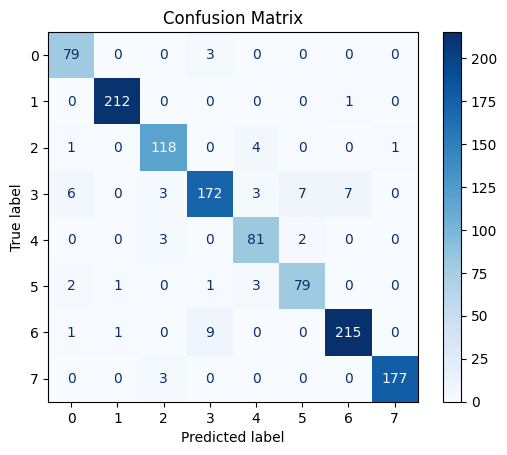

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = np.argmax(y_test, axis=1)
y_pred = preds
# Genera la confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Visualizza la confusion matrix con le etichette
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  
# Usa una mappa di colori blu
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.neural_network.save('/gdrive/MyDrive/weights.keras')

## 📊 Prepare Your SubmissionTo prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:```python# file: model.pyclass Model:    def __init__(self):        """Initialize the internal state of the model."""    def predict(self, X):        """Return a numpy array with the labels corresponding to the input X."""```The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [156]:
class Model2:    
    def __init__(self):        
        # Carica il modello senza compilazione        
        self.neural_network = tfk.models.load_model('/kaggle/working/weights_normal.keras')    
        
    def test(self, X_test, y_test):        
        test_loss, test_acc = self.neural_network.evaluate(X_test, y_test)
        print(f'Test accuracy: {test_acc}')

    def predict(self, X):
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

In [157]:
model3 = Model2()
model3.test(X_test2, y_test2)

W0000 00:00:1731935058.702457     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.703967     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.705304     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.706610     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.707904     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.709183     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.710514     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.711828     212 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935058.713178     212 gp

429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.9589 - loss: 0.1272

W0000 00:00:1731935169.645263     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.646427     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.647524     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.648622     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.649680     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.650747     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.651829     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.652924     211 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731935169.654054     211 gp

430/430 ━━━━━━━━━━━━━━━━━━━━ 118s 258ms/step - accuracy: 0.9584 - loss: 0.1289
Test accuracy: 0.8540591597557068


In [ ]:
from datetime import datetimefilename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'# Add files to the zip command if needed!zip {filename} model.py weights.kerasfrom google.colab import filesfiles.download(filename)

	zip warning: name not matched: model.py
	zip warning: name not matched: weights.keras

zip error: Nothing to do! (submission_241108_182910.zip)

FileNotFoundError: Cannot find file: submission_241108_182910.zip